In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as linalg

## Matrix operations  in NumPy

If we define a vector and matrix, we can multiply them explicitly, but it is better to use NumPy routines.

In [2]:
n = 30000
A = np.zeros((n, n))
x = np.zeros(n)

In [3]:
def explicit(A=None, x=None):
    n = A.shape[0]
    b = np.zeros(n)
    for i in np.arange(n):
        b[i] = (A[i, :] * x).sum()
    return(b)

In [4]:
%timeit b = explicit(A=A, x=x)

The slowest run took 4.71 times longer than the fastest. This could mean that an intermediate result is being cached.
2.48 s ± 1.95 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
%timeit b = A.dot(x)

422 ms ± 32.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


One can also make outer products and other operations with NumPy arrays.

In [6]:
x = np.zeros(100)
q = np.zeros(50)
y = np.outer(x, q)
print(y.shape)

(100, 50)


And the numpy.linalg module contains a plethora of other operations.

In [7]:
y = np.zeros((100, 100))
print(linalg.det(y))

0.0


## Solving a linear system

In [8]:
n = 20
A = np.random.random((20, 20))
x_actual = np.random.random(20)

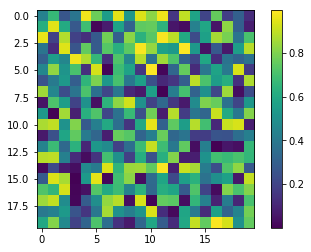

In [9]:
plt.imshow(A)
plt.colorbar()

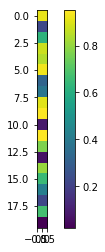

In [10]:
plt.imshow(x_actual.reshape((20, 1)))
plt.colorbar()

In [11]:
b = A.dot(x_actual)

In [12]:
x = linalg.solve(A, b).reshape(n)

In [13]:
print(x)

[0.92077325 0.2249261  0.62209384 0.87401646 0.84227649 0.93150847
 0.32194349 0.38794811 0.90718628 0.9500244  0.08658681 0.94647533
 0.7715162  0.06824449 0.80640269 0.65003341 0.42448865 0.22421797
 0.67248952 0.0229708 ]


In [14]:
print(x - x_actual)

[ 1.31006317e-14 -6.52256027e-15  3.66373598e-15 -5.55111512e-16
  9.88098492e-15  6.10622664e-15  7.77156117e-15 -3.16413562e-15
 -2.22044605e-15 -1.69864123e-14 -6.10622664e-16  1.04360964e-14
 -1.17683641e-14 -8.10462808e-15 -2.10942375e-15  1.40998324e-14
 -5.93969318e-15 -1.62092562e-14  1.23234756e-14  1.01654796e-15]


We can also solve this by explicitly taking the inverse. If we are going to need to solve the equation more than $N$ times, this becomes worthwhile, because we can just calculate and save the inverse, and then apply it, rather than performing the backsubstitution explicitly every time.

In [15]:
Ainv = linalg.inv(A)
x = Ainv.dot(b)
print(x - x_actual)

[-1.23456800e-13 -1.73194792e-14  6.36157793e-14  2.53130850e-14
  4.03010958e-14 -4.32986980e-14  2.77555756e-14 -1.90958360e-14
  1.40998324e-14 -3.48610030e-14  1.96509475e-14 -1.35447209e-14
  4.76285678e-14 -1.05471187e-14  6.33937347e-14 -5.93969318e-14
 -2.34257058e-14 -1.43218770e-14 -1.33226763e-14 -1.77635684e-15]


## NumPy Application of SVD

Let us explore how a matrix works as a linear mapping, and how SVD tells us about that linear mapping.

In [16]:
A = np.zeros((2, 2))
A[0, 0] = 1
A[0, 1] = 0.5
A[1, 0] = 0.5  
A[1, 1] = 1
print(A)

[[1.  0.5]
 [0.5 1. ]]


Let's take two basis vectors for the space of $\vec{x}$:

In [17]:
x0 = np.array([1., 0])
x1 = np.array([0., 1])
origin = np.array([0., 0.])

(-0.1, 1.3)

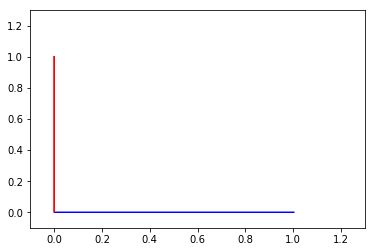

In [18]:
plt.arrow(origin[0], origin[1], x0[0], x0[1], color='blue')
plt.arrow(origin[0], origin[1], x1[0], x1[1], color='red')
plt.xlim((-0.1, 1.3))
plt.ylim((-0.1, 1.3))


In [19]:
b0 = A.dot(x0)
b1 = A.dot(x1)

(-0.1, 1.3)

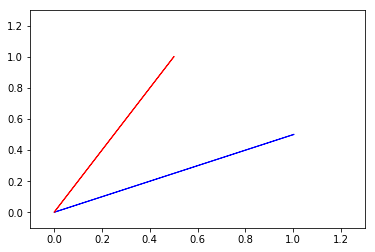

In [20]:
plt.arrow(origin[0], origin[1], b0[0], b0[1], color='blue')
plt.arrow(origin[0], origin[1], b1[0], b1[1], color='red')
plt.xlim((-0.1, 1.3))
plt.ylim((-0.1, 1.3))

In [21]:
(U, w, VT) = linalg.svd(A)

In [22]:
print(w)

[1.5 0.5]


In [23]:
print(U)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [24]:
print(VT)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [25]:
Ainv = VT.transpose().dot(np.diag(1. / w)).dot(U.transpose())
print(Ainv.dot(b0))
print(Ainv.dot(b1))

[1.00000000e+00 3.33066907e-16]
[-1.11022302e-16  1.00000000e+00]


In [26]:
x = np.random.normal(size=(2, 1000))
b = A.dot(x)

Text(0, 0.5, '$x_0$')

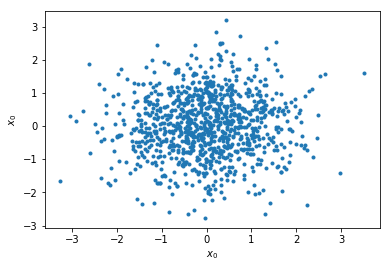

In [27]:
plt.plot(x[0, :], x[1, :], '.')
plt.xlabel("$x_0$")
plt.ylabel("$x_0$")

Text(0, 0.5, '$b_0$')

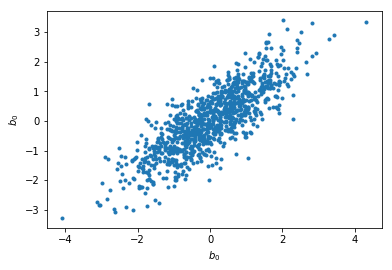

In [28]:
plt.plot(b[0, :], b[1, :], '.')
plt.xlabel("$b_0$")
plt.ylabel("$b_0$")

## A simple singular matrix

In [29]:
A = np.zeros((2, 2))
A[0, 0] = 1
A[0, 1] = -1
A[1, 0] = -1
A[1, 1] = 1
print(A)

[[ 1. -1.]
 [-1.  1.]]


We can see clearly the range of $A$ by throwing a bunch of random points at it.

In [30]:
x = np.random.normal(size=(2, 1000))
b = A.dot(x)

Text(0, 0.5, '$x_0$')

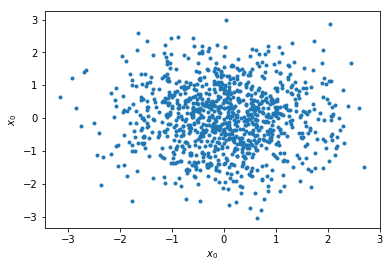

In [31]:
plt.plot(x[0, :], x[1, :], '.')
plt.xlabel("$x_0$")
plt.ylabel("$x_0$")

Text(0, 0.5, '$b_0$')

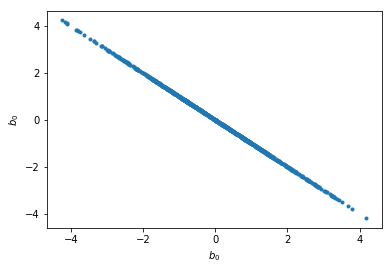

In [32]:
plt.plot(b[0, :], b[1, :], '.')
plt.xlabel("$b_0$")
plt.ylabel("$b_0$")

It is sufficient, in fact, to look just at what happens to the basis vectors (all other results are just a linear combination of those).

In [33]:
x0 = np.array([1., 0])
x1 = np.array([0., 1])
origin = np.array([0., 0.])

In [34]:
b0 = A.dot(x0)
b1 = A.dot(x1)

(-1.3, 1.3)

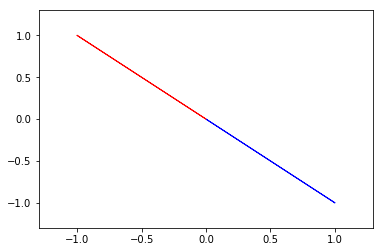

In [35]:
plt.arrow(origin[0], origin[1], b0[0], b0[1], color='blue')
plt.arrow(origin[0], origin[1], b1[0], b1[1], color='red')
plt.xlim((-1.3, 1.3))
plt.ylim((-1.3, 1.3))

SVD gives us a diagnosis; for much higher dimensional problems this is very useful.

In [36]:
(U, w, VT) = np.linalg.svd(A)

Note that this results in a zero component of $w$:

In [37]:
print(w)

[2. 0.]


The columns of ${\bf U}$ corresponding to non-zero $w_j$ give the range of ${\bf A}$:

In [38]:
print(U[:, 0])

[-0.70710678  0.70710678]


And the columns of ${\bf V}$ corresponding to zero $w_j$ give the null space: 

In [39]:
print(VT.transpose()[:, 1])

[0.70710678 0.70710678]


We can see how SVD works on some simple examples. If $\vec{b} = (-0.5, 0.6)$, we should expect to get an $\vec{x}$ that gets us as close as we can get to this within the range of ${\bf A}$. It will not get us exactly there however.

In [41]:
winv = np.zeros(len(w))
indx = np.where(w > 1.e-15)[0]
winv[indx] = 1. / w[indx]
print(winv)

[0.5 0. ]


In [42]:
Ainv = VT.transpose().dot(np.diag(winv)).dot(U.transpose()) 

In [43]:
b = np.array([-0.5, 0.6])
x = Ainv.dot(b)

In [44]:
print(x)

[-0.275  0.275]


${\bf A}\cdot\vec{x}$ yields some approximation of $\vec{b}$, that lies in the range:

In [45]:
bapprox = print(A.dot(x))

[-0.55  0.55]


If $\vec{b}$ is in the range, e.g. is $(1, -1)$, it can be recovered exactly: 

In [46]:
b = np.array([1., -1])
x = Ainv.dot(b)

In [47]:
print(x)

[ 0.5 -0.5]


In [51]:
bapprox = print(A.dot(x + np.array([ - 40., - 40.])))

[ 1. -1.]


Note that the null space allows me to add any vector with $x_0 = x_1$ to the above solution. The given $\vec{x}$ is the choice which minimizes its norm.

In [49]:
print(VT)

[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
